🚀 Task 1: Exploratory Data Analysis (EDA)

1️⃣ Load the Datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display the first few rows
print(customers.head())
print(products.head())
print(transactions.head())

2️⃣ Data Cleaning & Checking for Issues

In [ ]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check for duplicate rows
print("Duplicate customers:", customers.duplicated().sum())
print("Duplicate products:", products.duplicated().sum())
print("Duplicate transactions:", transactions.duplicated().sum())

3️⃣ Merge Data for Analysis

In [ ]:
# Merge transactions with customer and product info
df = transactions.merge(customers, on="CustomerID", how="left")
df = df.merge(products, on="ProductID", how="left")

# Convert date columns to datetime
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["SignupDate"] = pd.to_datetime(df["SignupDate"])

print(df.head())


4️⃣ Exploratory Data Analysis

1️⃣ Top 10 Best-Selling Products

C:\Users\SUBHAJIT MANDAL\AppData\Local\Temp\ipykernel_18008\2869304948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")


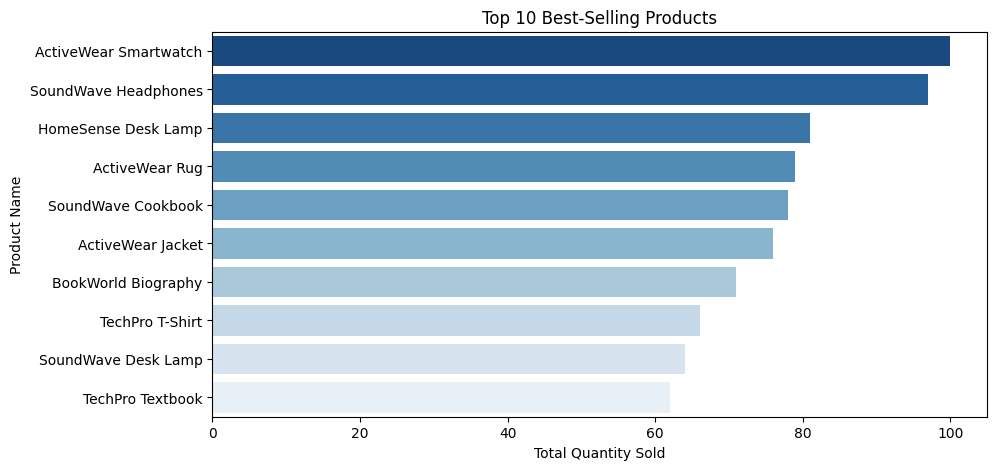

In [21]:
top_products = df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 10 Best-Selling Products")
plt.show()

2️⃣ Sales Trend Over Time

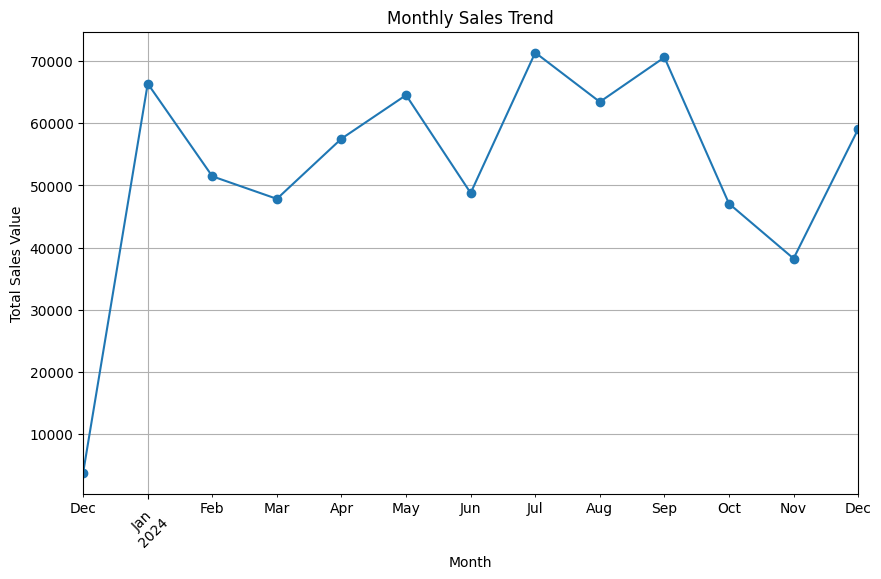

In [25]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.to_period('M')

# Group by Month and calculate total sales
monthly_sales = df.groupby('Month')['TotalValue'].sum()

# Plot the sales trend over time
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

3️⃣ Customer Distribution by Region

C:\Users\SUBHAJIT MANDAL\AppData\Local\Temp\ipykernel_18008\732161644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="coolwarm")


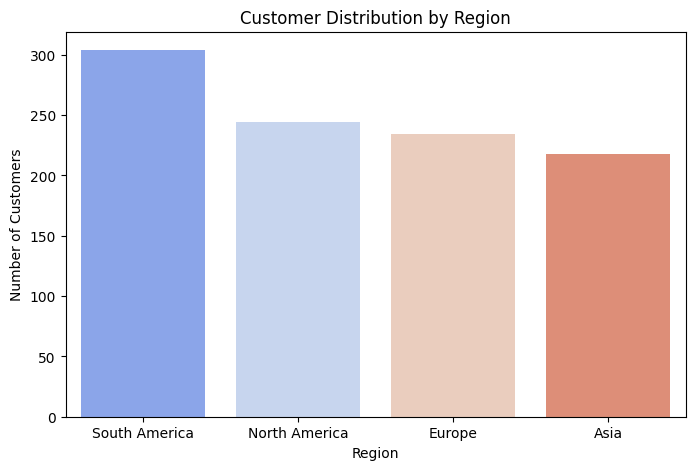

In [23]:
region_counts = df["Region"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="coolwarm")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Region")
plt.show()

4️⃣ Sales Volume vs. Revenue by Price Category

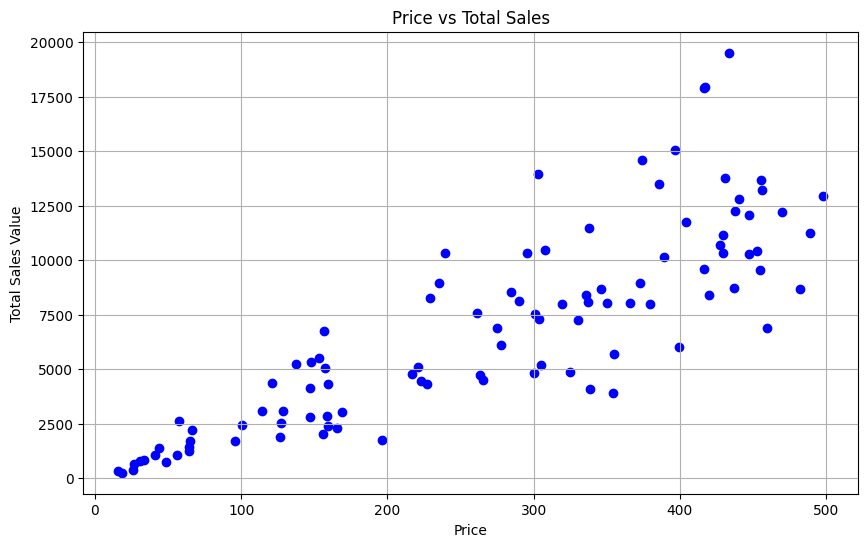

In [29]:
# Merge product data for price comparison
merged_df = pd.merge(df, products[['ProductID', 'Price']], on='ProductID')

# Group by Price and calculate total sales
price_sales_comparison = merged_df.groupby('Price').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

# Plot Price vs Total Sales
plt.figure(figsize=(10,6))
plt.scatter(price_sales_comparison['Price'], price_sales_comparison['TotalValue'], color='blue')
plt.title('Price vs Total Sales')
plt.xlabel('Price')
plt.ylabel('Total Sales Value')
plt.grid(True)
plt.show()
